# EEG-Stimuli

## Load Dataset

### View Dataset Attributes

In [4]:
from lib import *
import scipy.io

usable_datasets = get_usable_datasets("./dataset/datasets.mat")

### Load EEG Listening Example

In [5]:
import matplotlib.pyplot as plt
import scipy.io

data = scipy.io.loadmat("./dataset/S13.mat")
data = data["raw"][0][0][3][0][0]
data.shape

(62, 368275)

In [6]:
data.shape[1] / 500

736.55

### Preprocessing Info

In [7]:
proc = scipy.io.loadmat("./dataset/proc/S13.mat")
proc["proc"]

array([[(array(['29'], dtype='<U2'), array([[array(['25'], dtype='<U2'), array(['29'], dtype='<U2')]],
              dtype=object), array(['S13'], dtype='<U3'), array([], dtype='<U1'), array([[ 4.13900000e+03,  4.78900000e+03, -1.50000000e+02,
                 1.00000000e+00,  4.60000000e-02,  1.00000000e+00],
               [ 4.39800000e+03,  5.04800000e+03, -1.50000000e+02,
                 1.00000000e+00,  5.62721000e-01,  2.00000000e+00],
               [ 4.50900000e+03,  5.15900000e+03, -1.50000000e+02,
                 1.00000000e+00,  7.84543000e-01,  3.00000000e+00],
               ...,
               [ 3.65672000e+05,  3.66322000e+05, -1.50000000e+02,
                 1.20000000e+01,  4.58968292e+01,  2.14800000e+03],
               [ 3.65756000e+05,  3.66406000e+05, -1.50000000e+02,
                 1.20000000e+01,  4.60644482e+01,  2.14900000e+03],
               [ 3.65887000e+05,  3.66537000e+05, -1.50000000e+02,
                 1.20000000e+01,  4.63278492e+01,  2.15000000

### Get Total Audio Length

In [5]:
import librosa
import os

sr = 22_050

audio_fis = os.listdir("./dataset/audio")
audio_fis = [os.path.join("./dataset/audio/", fi) for fi in audio_fis]
print(audio_fis)

audio_lens = [librosa.load(fi)[0].shape[0] / sr for fi in audio_fis]
print(audio_lens)

audio_lens

KeyboardInterrupt: 

### Get Audio File Stats

In [10]:
import librosa

audio_fis = os.listdir("./dataset/audio")
audio_fis = [os.path.join("./dataset/audio/", fi) for fi in audio_fis]

s, sr = librosa.load(audio_fis[0])
print(sr)

22050


In [5]:
sum(audio_lens)

723.5405895691609

## Visualise Dataset

723.54 seconds of audio \
736.55 seconds of EEG (S13) \
733.05 seconds of EEG (S01) \
734.60 seconds of EEG (S03)

### Pre-processing and Alignment

In [8]:
proc = scipy.io.loadmat("./dataset/proc/S13.mat")
proc

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Nov 20 13:10:19 2018',
 '__version__': '1.0',
 '__globals__': [],
 'proc': array([[(array(['29'], dtype='<U2'), array([[array(['25'], dtype='<U2'), array(['29'], dtype='<U2')]],
               dtype=object), array(['S13'], dtype='<U3'), array([], dtype='<U1'), array([[ 4.13900000e+03,  4.78900000e+03, -1.50000000e+02,
                  1.00000000e+00,  4.60000000e-02,  1.00000000e+00],
                [ 4.39800000e+03,  5.04800000e+03, -1.50000000e+02,
                  1.00000000e+00,  5.62721000e-01,  2.00000000e+00],
                [ 4.50900000e+03,  5.15900000e+03, -1.50000000e+02,
                  1.00000000e+00,  7.84543000e-01,  3.00000000e+00],
                ...,
                [ 3.65672000e+05,  3.66322000e+05, -1.50000000e+02,
                  1.20000000e+01,  4.58968292e+01,  2.14800000e+03],
                [ 3.65756000e+05,  3.66406000e+05, -1.50000000e+02,
                  1.20000000e+01,  4.60

In [13]:
# Max Segments := 2150

proc_data = proc["proc"]
proc_data_segs = proc_data[0][0][4]
print(len(proc_data_segs))
for i in range(len(proc_data_segs)):
    print(proc_data_segs[i][-1])

2129
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0
146.0
147.0
149.0
150.0
151.0
152.0
153.0
154.0
155.0
156.0
157.0
158.0
159.0
160.0
161.0
162.0
163.0
164.0
165.0
166.0
167.0
168.0
169.0
170.0
171.0
172.0
173.0
174.0
175.0
176.0
177.0
178.0
179.0
180.0
181.0
182.0
183.0
184.0
185.0
186.

In [46]:
proc2 = scipy.io.loadmat("./dataset/proc/S01.mat")
proc2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Nov 20 13:10:15 2018',
 '__version__': '1.0',
 '__globals__': [],
 'proc': array([[(array(['29'], dtype='<U2'), array([[array(['25'], dtype='<U2'), array(['29'], dtype='<U2')]],
               dtype=object), array(['S01'], dtype='<U3'), array([], dtype='<U1'), array([[ 1.73600000e+03,  2.38600000e+03, -1.50000000e+02,
                  1.00000000e+00,  4.60000000e-02,  1.00000000e+00],
                [ 1.99500000e+03,  2.64500000e+03, -1.50000000e+02,
                  1.00000000e+00,  5.62721000e-01,  2.00000000e+00],
                [ 2.10600000e+03,  2.75600000e+03, -1.50000000e+02,
                  1.00000000e+00,  7.84543000e-01,  3.00000000e+00],
                ...,
                [ 3.63237000e+05,  3.63887000e+05, -1.50000000e+02,
                  1.20000000e+01,  4.58968292e+01,  2.14800000e+03],
                [ 3.63321000e+05,  3.63971000e+05, -1.50000000e+02,
                  1.20000000e+01,  4.60

### Segments

In [47]:
# Max Segments := 2150

proc_data = proc2["proc"]
proc_data_segs = proc_data[0][0][4]
proc_data_segs[0], proc_data_segs[1], proc_data_segs[2]

(array([ 1.736e+03,  2.386e+03, -1.500e+02,  1.000e+00,  4.600e-02,
         1.000e+00]),
 array([ 1.99500e+03,  2.64500e+03, -1.50000e+02,  1.00000e+00,
         5.62721e-01,  2.00000e+00]),
 array([ 2.10600e+03,  2.75600e+03, -1.50000e+02,  1.00000e+00,
         7.84543e-01,  3.00000e+00]))

### Visualise Electrodes - Entire Recording

In [43]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
print(data.shape[0])

def go(data, s_off, e_off):
    for i in list(range(data.shape[0]))[1:60]:
        # plt.plot(data[i, s_off:data.shape[1]-e_off])
        plt.plot(data[i, s_off:e_off])

62


(736.55, 12.0, 16.549999999999955)

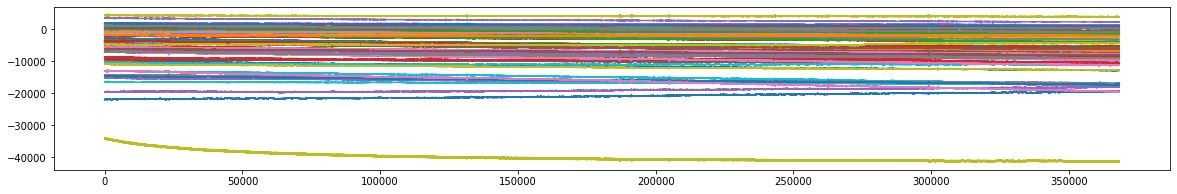

In [27]:
go(data, 0, -1)
data_secs = data.shape[1] / 500
data_secs, data_secs // 60, data_secs % 60

## Segment Analysis

In [1]:
from lib import *
dataset = BrennanDataset(
    root_dir="./dataset/",
    idx="S13")

In [35]:
first_seg = dataset[0]

eeg idxs: 4139 4789
eeg_raw.shape: (62, 650)
eeg_feats.shape: (106, 310)


(16736,)


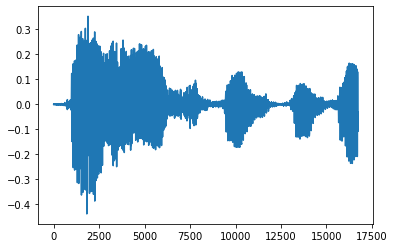

In [36]:
import matplotlib.pyplot as plt
print(first_seg["audio_raw"].shape)
plt.plot(first_seg["audio_raw"])

In [37]:
from matplotlib import cm

def plot_mel_spectrogram(mel_spec, title):
    fig, ax = plt.subplots(1)

    ax.set_title(f"Mel Spectogram \"{title}\"")
    pred = np.swapaxes(mel_spec, 0, 1)
    cax = ax.imshow(pred, interpolation='nearest', cmap=cm.coolwarm, origin='lower')

    return fig

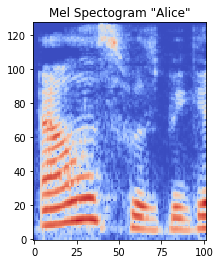

In [38]:
_ = plot_mel_spectrogram(first_seg["audio_feats"], first_seg["label"])

(60, 650)


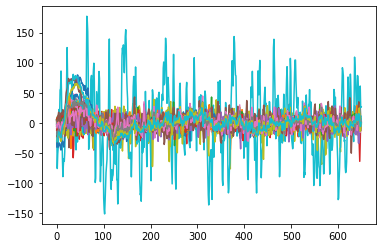

In [39]:
import matplotlib.pyplot as plt
eeg_seg = first_seg["eeg_raw"][0:60, :]
for i in range(eeg_seg.shape[0]):
    plt.plot(eeg_seg[i, :])
print(eeg_seg.shape)

(106, 310)


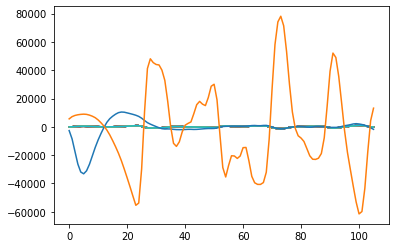

In [40]:
import matplotlib.pyplot as plt
eeg_seg = first_seg["eeg_feats"][0:60*5, :]
print(first_seg["eeg_feats"].shape)
for i in range(62):
    plt.plot(eeg_seg[:, (i*5)+0])